<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_003_study_essential/_002_boston/_002_boston_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict price of boston housing

# 들어가기 전

## Comma: [  **,**  ]

- 구분자

ex) 예를 들어,

    문장에서의 콤마는 `쉼표` 또는 `구두점`

**# Ex) 1,2,3,4,5**

    `요소 나열의 구분`


---


## Dot: [ **.** ]

- 접근 제어자


ex) 오늘도 공부하는 나는 발전하는 것이다.

    문장에서의 점은 `쉼표` 또는 `구두점`


    
**# Ex) tensorflow.keras**
    
    `접근 제어자`로 
    1. tensorflow 안에 존재하는
    2. keras 모듈에 `접근`할 때 사용하는 `키워드`


# load data

In [1]:
from tensorflow.keras.datasets import boston_housing
import numpy as np

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


## shape 확인하기

In [3]:
x_train.shape, y_train.shape , x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [12]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [10]:
y_train[0], y_train[1]

(15.2, 42.3)

# 사용할 패키지 import

In [49]:
import tensorflow as tf
from tensorflow.keras import models, layers

# 복습: build model

In [25]:
# relu
# xw + b 값이 0보다 작으면  0을 다음 layer에 보낸다.
# xw + b 값 0보다 크면 해당 값을 다음 layer에 보낸다.
model = models.Sequential([
                           layers.Input(shape=(13)), 

                           layers.Dense(units=32), 
                           layers.Activation(activation='relu'),
                           
                           layers.Dense(units=8),
                           layers.Activation(activation='relu'),

                           layers.Dense(units=1)
])

model.compile(loss='mse',
              optimizer='adam',
              metrics='accuracy')

# train model

In [28]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=64,
                    epochs=400,
                    validation_data=(x_test, y_test))

Epoch 1/400
7/7 [==============================] - 0s 15ms/step - loss: 25.8807 - accuracy: 0.0000e+00 - val_loss: 27.6855 - val_accuracy: 0.0000e+00
Epoch 2/400
7/7 [==============================] - 0s 14ms/step - loss: 25.9003 - accuracy: 0.0000e+00 - val_loss: 31.2334 - val_accuracy: 0.0000e+00
Epoch 3/400
7/7 [==============================] - 0s 15ms/step - loss: 26.1657 - accuracy: 0.0000e+00 - val_loss: 34.4697 - val_accuracy: 0.0000e+00
Epoch 4/400
7/7 [==============================] - 0s 14ms/step - loss: 27.9776 - accuracy: 0.0000e+00 - val_loss: 35.7827 - val_accuracy: 0.0000e+00
Epoch 5/400
7/7 [==============================] - 0s 14ms/step - loss: 27.5474 - accuracy: 0.0000e+00 - val_loss: 34.0878 - val_accuracy: 0.0000e+00
Epoch 6/400
7/7 [==============================] - 0s 14ms/step - loss: 25.8251 - accuracy: 0.0000e+00 - val_loss: 29.3893 - val_accuracy: 0.0000e+00
Epoch 7/400
7/7 [==============================] - 0s 15ms/step - loss: 25.9123 - accuracy: 0.0000e+

# Sequetial.add 사용하기

In [61]:
model2 = models.Sequential()

model2.add(layers.Input(shape=(13)))

print(model2.summary())
model2.add(layers.Dense(units=64))
model2.add(layers.Activation(activation='relu'))

print(model2.summary())
model2.add(layers.Dense(units=8))
model2.add(layers.Activation(activation='relu'))

# output의 변화 확인하기
print(model2.outputs)
model2.add(layers.Dense(1))

# output의 변화 확인하기
print(model2.outputs)
# 마지막 summary 확인하기
print("="*100)
print(model2.summary())

model2.compile(loss='mse',
               optimizer='adam',
               metrics='accuracy')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                896       
_________________________________________________________________
activation_17 (Activation)   (None, 64)                0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None
[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'activation_18')>]
[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_29')>]
Model: "sequential_3"
_______________________________________________

## tarin sequential model

In [64]:
model2.fit(x_train,
           y_train,
           batch_size=64,
           epochs=300,
           verbose=0,
           validation_data=(x_test, y_test),
           validation_split=.3)

## 검증

In [66]:
score = model2.evaluate(x_test, y_test)
print(score)

4/4 [==============================] - 0s 3ms/step - loss: 30.5835 - accuracy: 0.0000e+00
[30.583515167236328, 0.0]


# 복습: 시각화 추가

In [30]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):  # 그래프로 만들 함수
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

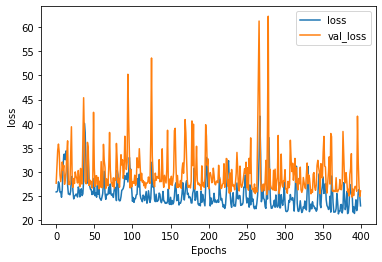

In [36]:
plot_graphs(history, 'loss')

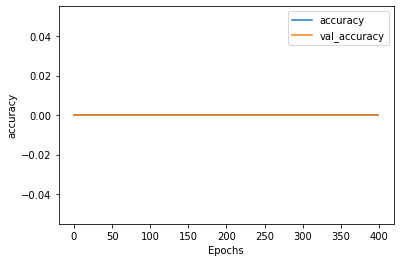

In [37]:
plot_graphs(history, 'accuracy')

# history 객체 확인하기

In [32]:
type(history.history)

dict

dictionary

In [48]:
x_test[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

## 첫 번째 모델 - 예측 확인하기

In [72]:
pred = model.predict(x_test)

In [45]:
y_test[0], pred[0]

(7.2, array([10.882268], dtype=float32))

In [46]:
y_test[1], pred[1]

(18.8, array([18.684893], dtype=float32))

In [47]:
y_test[3], pred[3]

(27.0, array([27.912283], dtype=float32))

## 두 번째 모델 - 예측 확인하기

In [67]:
pred2 = model2.predict(x_test)

In [69]:
y_test[1], pred2[1]

(18.8, array([19.66149], dtype=float32))

In [70]:
y_test[2], pred2[2]

(19.0, array([22.638556], dtype=float32))

In [71]:
y_test[7], pred[7]

(22.9, array([23.76822], dtype=float32))